In [1]:
# Week 3: Optimization & Scheduling
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
import pandas as pd

forecast_df = pd.read_csv(r"C:\Users\91735\OneDrive\Desktop\AI-Green-Energy-Grid\forecast_df.csv")
forecast_df.head()


,date,waste_forecast,energy_forecast
0,2025-01-31,107.255172,181.381609
1,2025-02-01,107.910345,180.352466
2,2025-02-02,108.565517,179.323322
3,2025-02-03,109.220690,178.294179
4,2025-02-04,109.875862,177.265035


In [5]:
# Step 2: Define conversion assumptions
WASTE_TO_ENERGY = 500   # kWh per ton of waste
CO2_TO_ENERGY = 0.1     # kWh per ppm CO2


In [6]:
# Step 3: Calculate energy supply from waste and CO2
forecast_df["energy_from_waste"] = forecast_df["waste_forecast"] * WASTE_TO_ENERGY
forecast_df["energy_from_co2"] = forecast_df["energy_forecast"] * CO2_TO_ENERGY
forecast_df["total_supply"] = forecast_df["energy_from_waste"] + forecast_df["energy_from_co2"]

# Calculate supply-demand gap
forecast_df["gap"] = forecast_df["total_supply"] - forecast_df["energy_forecast"]

forecast_df.head()


,date,waste_forecast,energy_forecast,energy_from_waste,energy_from_co2,total_supply,gap
0,2025-01-31,107.255172,181.381609,53627.586207,18.138161,53645.724368,53464.342759
1,2025-02-01,107.910345,180.352466,53955.172414,18.035247,53973.207660,53792.855195
2,2025-02-02,108.565517,179.323322,54282.758621,17.932332,54300.690953,54121.367631
3,2025-02-03,109.220690,178.294179,54610.344828,17.829418,54628.174245,54449.880067
4,2025-02-04,109.875862,177.265035,54937.931034,17.726504,54955.657538,54778.392503


In [7]:
# Step 4: Save results to CSV
forecast_df.to_csv("week3_schedule.csv", index=False)
print("✅ Results saved as week3_schedule.csv")


✅ Results saved as week3_schedule.csv


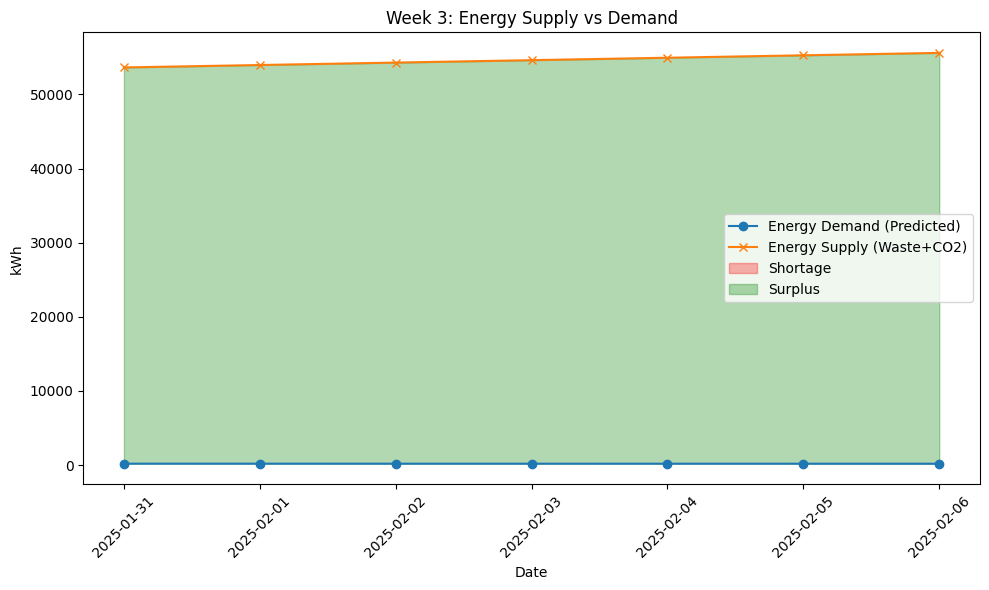

In [8]:
# Step 5: Plot Supply vs Demand
plt.figure(figsize=(10,6))
plt.plot(forecast_df["date"], forecast_df["energy_forecast"], label="Energy Demand (Predicted)", marker="o")
plt.plot(forecast_df["date"], forecast_df["total_supply"], label="Energy Supply (Waste+CO2)", marker="x")

# Highlight surplus (green) and shortage (red)
plt.fill_between(forecast_df["date"], forecast_df["total_supply"], forecast_df["energy_forecast"], 
                 where=(forecast_df["total_supply"] < forecast_df["energy_forecast"]), 
                 color="red", alpha=0.3, label="Shortage")
plt.fill_between(forecast_df["date"], forecast_df["total_supply"], forecast_df["energy_forecast"], 
                 where=(forecast_df["total_supply"] >= forecast_df["energy_forecast"]), 
                 color="green", alpha=0.3, label="Surplus")

plt.xticks(rotation=45)
plt.legend()
plt.title("Week 3: Energy Supply vs Demand")
plt.xlabel("Date")
plt.ylabel("kWh")
plt.tight_layout()
plt.savefig("week3_schedule.png")  # Save graph
plt.show()
